<a href="https://colab.research.google.com/github/ABHIRAM199/my_practice/blob/main/Word_Ebbedding_and_Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word Ebbedding and Word2Vec

# Agenda
* Introduction to Word Ebbedding and Word2Vec
* Word2Vec
* Skip-gram Model
* Hierarchical Softmax and Negative Sampling
* Applications of Word2Vec

# Introduction to Word Ebbedding and Word2Vec
- Word2Vec is a popular word embedding technique used in natural language processing (NLP) that transforms words into vectors of real numbers. This method captures semantic meanings of words based on their context in a corpus. Developed by Mikolov et al. at Google in 2013, Word2Vec has
two primary models: Continuous Bag of Words (CBOW) and Skip-gram.
- Word embeddings are a type of word representation that allows words to be represented as vectors in a continuous vector space.

**Purpose:**
- They capture semantic and syntactic relationships between words.

**Applications:**
- Word embeddings are used in various NLP tasks such as machine translation, sentiment analysis, and question answering.

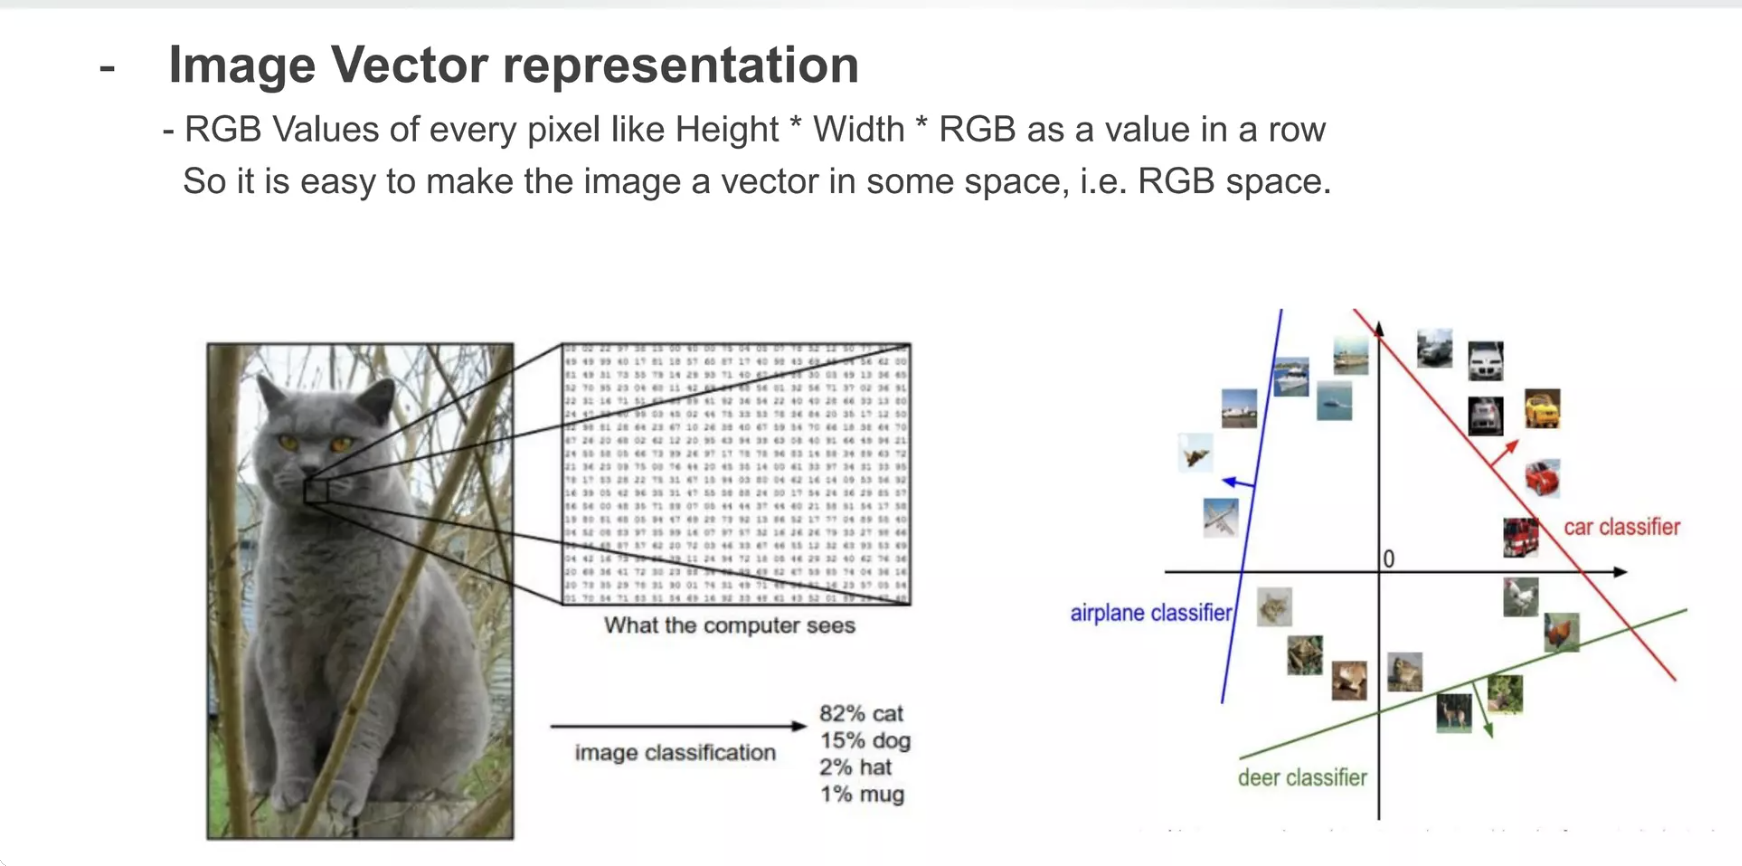

# Word2Vec

Word2Vec was introduced by Tomas Mikolov and colleagues in 2013 at Google. It revolutionized natural language processing by providing a way to represent words as dense vectors, capturing their meanings in a continuous vector space.

**Main Models:**

**Continuous Bag of Words (CBOW):**
- **Objective:** Predict the target word from a given context of surrounding words.
- **Mechanism:** CBOW takes the average of the vectors of the context words and uses it to predict the target word. It is generally faster and works well with smaller datasets.
- **Example:** Given the context "The cat sat on the ____", CBOW predicts the missing word "mat".

**Skip-gram:**
- **Objective:** Predict the context words given a target word.
- **Mechanism:** Skip-gram takes each word in a sentence and uses it to predict surrounding words within a certain window size. It is computationally more intensive but works better with larger datasets.
- **Example:** Given the target word "cat", Skip-gram predicts context words like "The", "sat", "on", "the".

**Training Process:**
Both CBOW and Skip-gram use a neural network with a single hidden layer. The input layer represents the one-hot encoded words, and the output layer represents the predicted words. The weights of the hidden layer are the word embeddings.

**Objective Function:**
Word2Vec uses the softmax function to compute the probability distribution over the vocabulary for the predicted words. To make training more efficient, techniques like Negative Sampling and Hierarchical Softmax are used to approximate the softmax function.

**Negative Sampling:**
Instead of updating the weights for all words in the vocabulary, Word2Vec updates only a small sample of negative examples (words not in the context). This reduces computational complexity significantly.

- To visualize high-dimensional word embeddings, techniques like t-SNE (t-distributed Stochastic Neighbor Embedding) and PCA (Principal Component Analysis) are used. These techniques reduce the dimensions of the word vectors to 2D or 3D, allowing us to see the relationships between words.

In [ ]:
!pip install gensim scikit-learn matplotlib

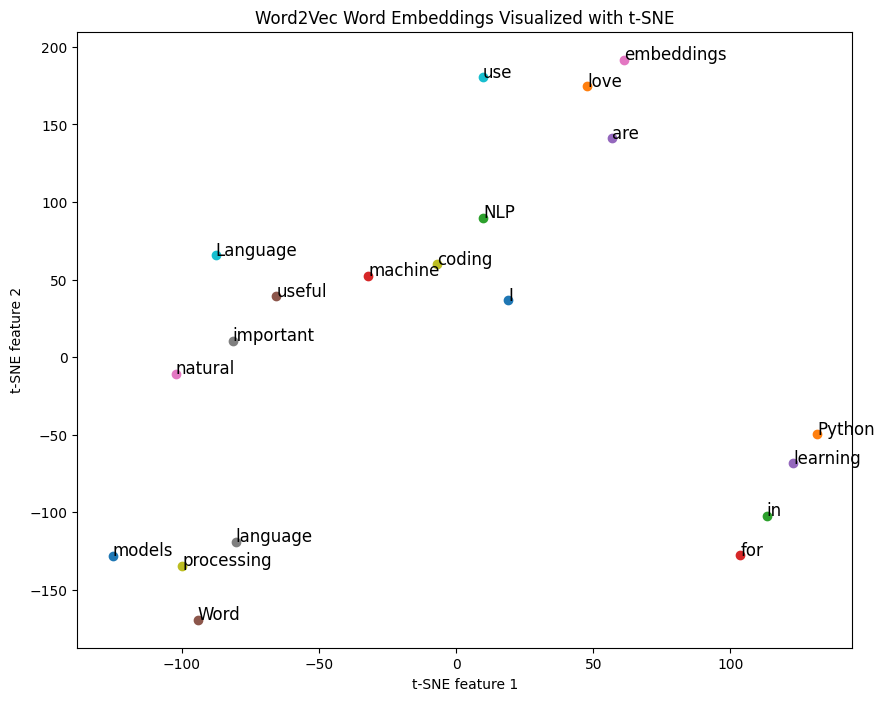

In [ ]:
import gensim
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Sample data
sentences = [
    ['I', 'love', 'natural', 'language', 'processing'],
    ['Language', 'models', 'are', 'useful'],
    ['I', 'use', 'machine', 'learning', 'for', 'NLP'],
    ['Word', 'embeddings', 'are', 'important', 'for', 'NLP'],
    ['I', 'love', 'coding', 'in', 'Python']
]

# Train Word2Vec model
model = Word2Vec(sentences, vector_size=50, window=5, min_count=1, workers=4)

# Get word vectors
word_vectors = model.wv

# Reduce dimensions to 2D using TSNE
tsne = TSNE(n_components=2, random_state=0, perplexity=2)  # Adjusted perplexity
word_vecs_2d = tsne.fit_transform(word_vectors.vectors)

# Plot the word vectors
plt.figure(figsize=(10, 8))
for i, word in enumerate(word_vectors.index_to_key):
    plt.scatter(word_vecs_2d[i, 0], word_vecs_2d[i, 1])
    plt.text(word_vecs_2d[i, 0] + 0.02, word_vecs_2d[i, 1] + 0.02, word, fontsize=12)

plt.xlabel("t-SNE feature 1")
plt.ylabel("t-SNE feature 2")
plt.title("Word2Vec Word Embeddings Visualized with t-SNE")
plt.show()


# Continuous Bag of Words (CBOW)

CBOW predicts a target word from a given context window of surrounding words. It uses the context words (the words surrounding the target word) to predict the target word itself.

- **Input:**
Context words within a window size. For example, in the sentence "The cat sat on the mat", if the window size is 2, the context words for "sat" are "The", "cat", "on", "the".
- **Output:**
The target word, which is the word being predicted based on the context words. In the above example, the target word is "sat".

**Detailed Steps:**
- **One-Hot Encoding:**
Each context word is represented as a one-hot encoded vector. The vocabulary size
𝑉
 determines the length of these vectors, with all elements set to 0 except for a 1 at the index corresponding to the word.

- **Hidden Layer (Projection Layer):**
The one-hot vectors of the context words are passed through a shared hidden layer. The weights of this hidden layer are the word embeddings we aim to learn.
The hidden layer has weights
𝑊
 of size
𝑉
×
𝑁
,where
𝑁
 is the dimension of the word embeddings. For each context word, the corresponding row from
𝑊 (the word embedding) is extracted.
These embeddings are averaged to produce a single vector representing the context.

- **Output Layer:**
The average vector is then passed to the output layer, which has weights
𝑊
′
  of size
𝑁
×
𝑉
. The output layer uses the softmax function to produce a probability distribution over the entire vocabulary, predicting the target word.

- **Loss Function:**
The loss function used is typically the cross-entropy loss between the predicted probability distribution and the true one-hot encoded target word.

- **Optimization:**
Gradient descent or its variants are used to minimize the loss function, updating the weights
𝑊
 and
𝑊
′

  to improve the model's predictions.

**Advantages:Faster to Train Compared to Skip-gram:**
- CBOW is computationally more efficient because it averages context words to predict the target word, reducing the complexity of the training process.

**Works Well with Small Datasets:**
- CBOW performs better than Skip-gram on smaller datasets, as it effectively utilizes the surrounding context to predict the target word.


####**Visualization of CBOW Architecture**

In [ ]:
!pip install matplotlib networkx


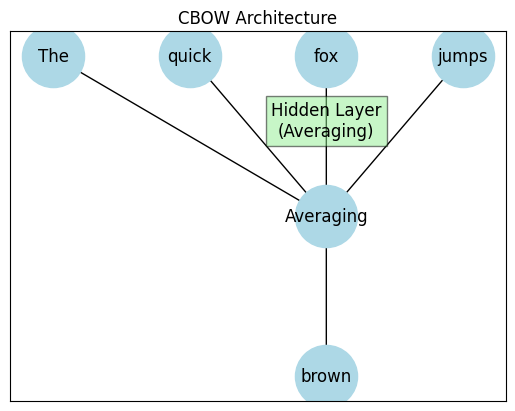

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Initialize the graph
G = nx.DiGraph()

# Define nodes
context_words = ["The", "quick", "fox", "jumps"]
target_word = "brown"

# Add context word nodes
for i, word in enumerate(context_words):
    G.add_node(word, pos=(i, 2))

# Add target word node
G.add_node(target_word, pos=(2, 0))

# Add the hidden layer node (averaging)
G.add_node("Averaging", pos=(2, 1))

# Add edges from context words to the hidden layer
for word in context_words:
    G.add_edge(word, "Averaging")

# Add edge from hidden layer to target word
G.add_edge("Averaging", target_word)

# Define positions of nodes
pos = nx.get_node_attributes(G, 'pos')

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=2000)

# Draw edges
nx.draw_networkx_edges(G, pos, edgelist=[(word, "Averaging") for word in context_words], arrowstyle='->', arrowsize=20)
nx.draw_networkx_edges(G, pos, edgelist=[("Averaging", target_word)], arrowstyle='->', arrowsize=20)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

# Add titles to layers
plt.text(2, 1.5, 'Hidden Layer\n(Averaging)', horizontalalignment='center', fontsize=12, bbox=dict(facecolor='lightgreen', alpha=0.5))

# Display the graph
plt.title("CBOW Architecture")
plt.show()


# Skip-gram Model

- The Skip-gram model is designed to predict the context words given a target word. Unlike the Continuous Bag of Words (CBOW) model, which predicts a target word based on context, Skip-gram takes a single word within a context and attempts to predict the surrounding context words.

**Training Process:**

**Input:**
- A target word, represented as a one-hot encoded vector.

**Output:**
- Context words within a specified window size around the target word.

**Detailed Steps:**
- **One-Hot Encoding:**
The target word is represented as a one-hot encoded vector. The vocabulary size
𝑉
 determines the length of this vector, with all elements set to 0 except for a 1 at the index corresponding to the word.

- **Hidden Layer (Projection Layer):**
The one-hot vector of the target word is passed through a hidden layer. The weights of this hidden layer are the word embeddings we aim to learn.
The hidden layer has weights
𝑊
 of size
𝑉
×
𝑁
, where
𝑁
 is the dimension of the word embeddings. For the target word, the corresponding row from
𝑊
(the word embedding) is extracted.

- **Output Layer:**
The word embedding is then passed to the output layer, which has weights
𝑊
′
W
′
  of size
𝑁
×
𝑉
. The output layer uses the softmax function to produce a probability distribution over the entire vocabulary, predicting the context words.
Loss Function:

The loss function used is typically the cross-entropy loss between the predicted probability distribution and the true one-hot encoded context words.

- **Optimization:**
Gradient descent or its variants are used to minimize the loss function, updating the weights
𝑊
 and
𝑊
′
  to improve the model's predictions.

**Advantages:**

- **Captures Complex Relationships:**
Skip-gram can capture complex relationships between words, including those that are far apart in the text.
Effective with Large Datasets:

- Skip-gram works well with large datasets and can learn high-quality word embeddings even with infrequent words.

####Visualization of Skip-gram Architecture

In [ ]:
pip install matplotlib networkx


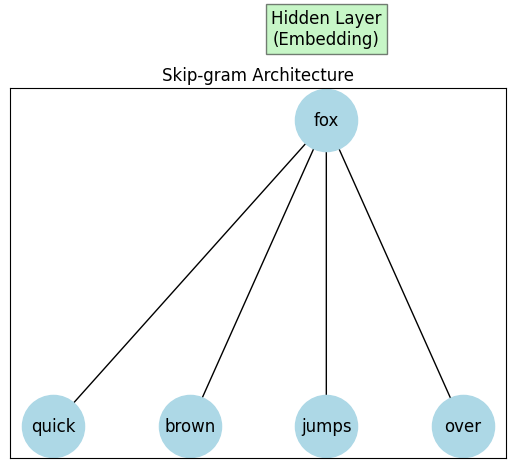

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Initialize the graph
G = nx.DiGraph()

# Define nodes
target_word = "fox"
context_words = ["quick", "brown", "jumps", "over"]

# Add target word node
G.add_node(target_word, pos=(2, 2))

# Add context word nodes
for i, word in enumerate(context_words):
    G.add_node(word, pos=(i, 0))

# Add edges from target word to context words
for word in context_words:
    G.add_edge(target_word, word)

# Define positions of nodes
pos = nx.get_node_attributes(G, 'pos')

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=2000)

# Draw edges
nx.draw_networkx_edges(G, pos, edgelist=[(target_word, word) for word in context_words], arrowstyle='->', arrowsize=20)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

# Add titles to layers
plt.text(2, 2.5, 'Hidden Layer\n(Embedding)', horizontalalignment='center', fontsize=12, bbox=dict(facecolor='lightgreen', alpha=0.5))

# Display the graph
plt.title("Skip-gram Architecture")
plt.show()


#Hierarchical Softmax and Negative Sampling

###Hierarchical Softmax

- Hierarchical Softmax is a technique to efficiently compute the probability distribution over a large vocabulary. Instead of computing the softmax over all words in the vocabulary, it uses a binary tree (Huffman tree) to reduce the complexity.

**Architecture:**

- **Huffman Tree:**
A binary tree where each leaf node represents a word in the vocabulary.
The path from the root to a leaf node defines a unique binary code for each word.
Frequently occurring words have shorter paths.

**Training Process:**
- **Internal Nodes:** Each internal node in the tree has an associated weight vector.
- **Traversal:** To predict a word, traverse the tree from root to leaf, updating weights along the path.
- **Binary Classification:** At each node, perform a binary classification to decide whether to go left or right.


**Advantages:**
- **Efficiency:** Reduces the complexity from
𝑂
(
𝑉
)
 to
𝑂
(
log
⁡
𝑉
)
, where
𝑉
 is the vocabulary size.
- **Effective for Large Vocabularies:** Particularly useful when dealing with very large vocabularies.


####Visualization of Hierarchical Softmax

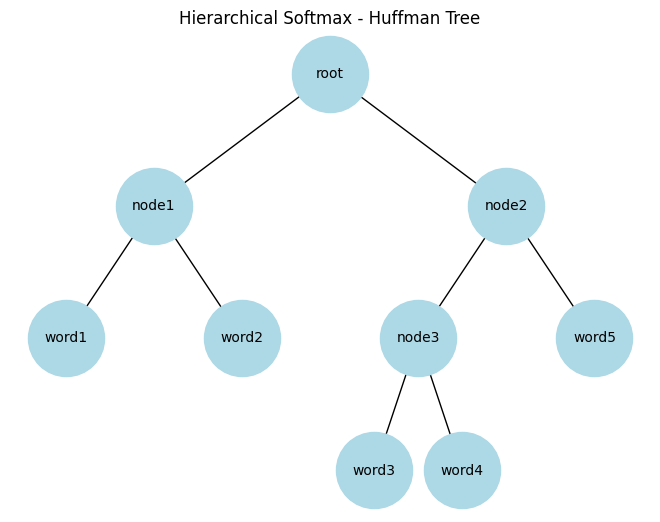

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a binary tree using networkx
G = nx.Graph()

# Add nodes and edges for the binary tree
edges = [
    ("root", "node1"), ("root", "node2"),
    ("node1", "word1"), ("node1", "word2"),
    ("node2", "node3"), ("node2", "word5"),
    ("node3", "word3"), ("node3", "word4")
]

G.add_edges_from(edges)

# Define positions for nodes
pos = {
    "root": (3, 3), "node1": (1, 2), "node2": (5, 2),
    "word1": (0, 1), "word2": (2, 1), "node3": (4, 1),
    "word3": (3.5, 0), "word4": (4.5, 0), "word5": (6, 1)
}

# Draw the tree
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_family="sans-serif", arrows=False)

plt.title("Hierarchical Softmax - Huffman Tree")
plt.show()


###Negative Sampling

Negative Sampling is an approximation method that simplifies the softmax computation by only updating a small sample of negative examples (words not in the context) along with the positive examples (actual context words).

**Training Process:**
- **Positive Example:**
For a given target word, the context words are treated as positive examples.

- **Negative Examples:**
Sample a few words from the vocabulary that are not in the context (negative examples).

**Binary Classification:**
- Train a binary classifier to distinguish between positive and negative examples.

**Loss Function:**
- Use a simplified objective function that maximizes the probability of the positive examples and minimizes the probability of the negative examples.

**Advantages:**
- **Efficiency:** Reduces computational complexity significantly, making training feasible for very large datasets.
- **Flexibility:** Allows control over the number of negative samples, trading off between computational cost and accuracy.


####Visualization of Negative Sampling

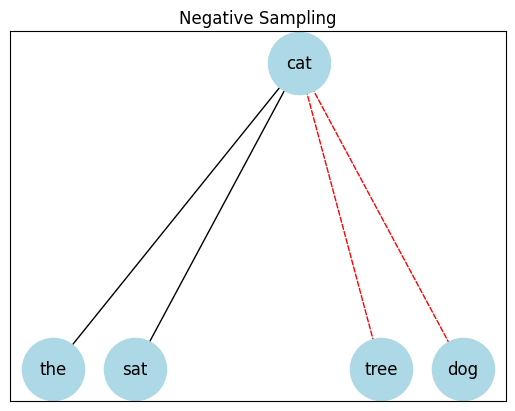

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Create the graph
G = nx.DiGraph()

# Define nodes
target_word = "cat"
context_words = ["the", "sat"]
negative_samples = ["tree", "dog"]

# Add nodes
G.add_node(target_word, pos=(3, 3))
for i, word in enumerate(context_words):
    G.add_node(word, pos=(i, 2))
for i, word in enumerate(negative_samples):
    G.add_node(word, pos=(i+4, 2))

# Add edges from target word to context words
for word in context_words:
    G.add_edge(target_word, word)

# Add edges from target word to negative samples
for word in negative_samples:
    G.add_edge(target_word, word, color='r', style='dashed')

# Define positions of nodes
pos = nx.get_node_attributes(G, 'pos')

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=2000)

# Draw edges
edges = G.edges()
edge_colors = ['black' if 'color' not in G[u][v] else G[u][v]['color'] for u,v in edges]
edge_styles = ['solid' if 'style' not in G[u][v] else G[u][v]['style'] for u,v in edges]

nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=edge_colors, style=edge_styles, arrowsize=20)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

# Add titles to layers
plt.title("Negative Sampling")
plt.show()


**Summary**

**Hierarchical Softmax:**
Uses a binary tree to reduce the complexity of computing the softmax function over a large vocabulary.
Efficient and scalable, suitable for large vocabularies.

**Negative Sampling:**
Simplifies the training process by updating only a small number of negative samples along with positive samples.
Reduces computational cost while maintaining accuracy, making it feasible to train models on large datasets.

# Applications of Word2Vec

####Some of the key applications of Word2Vec:

**1. Semantic Similarity**
- Word2Vec can measure the similarity between words based on their vector representations. Words with similar meanings are located close to each other in the vector space.

**Applications:**
- **Synonym Detection:** Finding words with similar meanings.
- **Query Expansion:** Enhancing search queries by adding semantically similar terms to improve search results.

**Example:**
- Finding synonyms for "king" might yield words like "queen", "prince", and "monarch".



**2. Machine Translation**

- Word2Vec embeddings can be used to align words from different languages in a common vector space, facilitating translation tasks.

**Applications:**

- **Bilingual Word Embeddings:** Mapping words from one language to another based on their embeddings.
- **Phrase-Based Translation Models:** Improving the quality of translations by understanding the context and meaning of phrases.

**Example:**
- Translating the word "dog" from English to Spanish, resulting in "perro".




**3. Sentiment Analysis**

- Word embeddings capture the sentiment of words, which can be used to analyze the sentiment of larger texts like sentences or documents.

**Applications:**

- **Product Reviews:** Determining the overall sentiment (positive, negative, neutral) of customer reviews.
- **Social Media Monitoring:** Analyzing sentiments expressed in social media posts to gauge public opinion.

**Example:**
- Classifying a movie review as positive or negative based on the sentiment of words like "excellent", "terrible", etc.



